In [34]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [35]:
HEIGHT = 64
WIDTH = 120

def create_image_data(folder):
    images_array = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        img = cv2.resize(img,(WIDTH,HEIGHT))
        images_array.append(img)        
    images_array = np.array(images_array)/255
    return images_array

def create_plot(no, X_data, Y_data, pred_data):
    difference = np.abs(pred_data[no].reshape(HEIGHT,WIDTH) - Y_data[no])
    plt.rcParams["figure.figsize"] = [18.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.subplot(1, 4, 1)
    plt.imshow(X_data[no])
    plt.title("geometry")
    plt.subplot(1, 4, 2)
    plt.imshow(Y_data[no])
    plt.title("CFD")
    plt.subplot(1, 4, 3)
    plt.imshow(pred_data[no])
    plt.title("Autoencoder")
    plt.subplot(1, 4, 4)
    plt.imshow(difference)
    plt.title("|Difference|")
    plt.show()

X_images = create_image_data("data_X")
Y_images = create_image_data("data_Y")


In [36]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(HEIGHT, WIDTH, 1)))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1, (3,3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
model.fit(X_images, Y_images, epochs=8000, shuffle=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 64, 120, 32)       320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 60, 8)         2312      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 16, 30, 8)         584       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 15, 8)        

1/1 [==============================] - 0s 145ms/step - loss: 0.0299
Epoch 71/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0295
Epoch 72/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0291
Epoch 73/8000
1/1 [==============================] - 0s 146ms/step - loss: 0.0287
Epoch 74/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0283
Epoch 75/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0279
Epoch 76/8000
1/1 [==============================] - 0s 145ms/step - loss: 0.0276
Epoch 77/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0272
Epoch 78/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0269
Epoch 79/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0266
Epoch 80/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0263
Epoch 81/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0260
Epoch 82/8000
1/1 [===========

1/1 [==============================] - 0s 177ms/step - loss: 0.0124
Epoch 268/8000
1/1 [==============================] - 0s 174ms/step - loss: 0.0124
Epoch 269/8000
1/1 [==============================] - 0s 189ms/step - loss: 0.0124
Epoch 270/8000
1/1 [==============================] - 0s 172ms/step - loss: 0.0124
Epoch 271/8000
1/1 [==============================] - 0s 218ms/step - loss: 0.0123
Epoch 272/8000
1/1 [==============================] - 0s 178ms/step - loss: 0.0123
Epoch 273/8000
1/1 [==============================] - 0s 187ms/step - loss: 0.0123
Epoch 274/8000
1/1 [==============================] - 0s 177ms/step - loss: 0.0123
Epoch 275/8000
1/1 [==============================] - 0s 164ms/step - loss: 0.0122
Epoch 276/8000
1/1 [==============================] - 0s 164ms/step - loss: 0.0122
Epoch 277/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0122
Epoch 278/8000
1/1 [==============================] - 0s 170ms/step - loss: 0.0122
Epoch 279/8000
1/1 

1/1 [==============================] - 0s 208ms/step - loss: 0.0092
Epoch 464/8000
1/1 [==============================] - 0s 248ms/step - loss: 0.0091
Epoch 465/8000
1/1 [==============================] - 0s 181ms/step - loss: 0.0091
Epoch 466/8000
1/1 [==============================] - 0s 168ms/step - loss: 0.0091
Epoch 467/8000
1/1 [==============================] - 0s 172ms/step - loss: 0.0091
Epoch 468/8000
1/1 [==============================] - 0s 174ms/step - loss: 0.0091
Epoch 469/8000
1/1 [==============================] - 0s 178ms/step - loss: 0.0091
Epoch 470/8000
1/1 [==============================] - 0s 162ms/step - loss: 0.0091
Epoch 471/8000
1/1 [==============================] - 0s 168ms/step - loss: 0.0091
Epoch 472/8000
1/1 [==============================] - 0s 174ms/step - loss: 0.0090
Epoch 473/8000
1/1 [==============================] - 0s 180ms/step - loss: 0.0090
Epoch 474/8000
1/1 [==============================] - 0s 196ms/step - loss: 0.0090
Epoch 475/8000
1/1 

1/1 [==============================] - 0s 184ms/step - loss: 0.0081
Epoch 660/8000
1/1 [==============================] - 0s 223ms/step - loss: 0.0080
Epoch 661/8000
1/1 [==============================] - 0s 184ms/step - loss: 0.0080
Epoch 662/8000
1/1 [==============================] - 0s 160ms/step - loss: 0.0080
Epoch 663/8000
1/1 [==============================] - 0s 160ms/step - loss: 0.0080
Epoch 664/8000
1/1 [==============================] - 0s 153ms/step - loss: 0.0080
Epoch 665/8000
1/1 [==============================] - 0s 154ms/step - loss: 0.0080
Epoch 666/8000
1/1 [==============================] - 0s 158ms/step - loss: 0.0080
Epoch 667/8000
1/1 [==============================] - 0s 154ms/step - loss: 0.0080
Epoch 668/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0080
Epoch 669/8000
1/1 [==============================] - 0s 194ms/step - loss: 0.0081
Epoch 670/8000
1/1 [==============================] - 0s 161ms/step - loss: 0.0080
Epoch 671/8000
1/1 

1/1 [==============================] - 0s 187ms/step - loss: 0.0075
Epoch 856/8000
1/1 [==============================] - 0s 180ms/step - loss: 0.0075
Epoch 857/8000
1/1 [==============================] - 0s 169ms/step - loss: 0.0074
Epoch 858/8000
1/1 [==============================] - 0s 186ms/step - loss: 0.0075
Epoch 859/8000
1/1 [==============================] - 0s 195ms/step - loss: 0.0074
Epoch 860/8000
1/1 [==============================] - 0s 195ms/step - loss: 0.0075
Epoch 861/8000
1/1 [==============================] - 0s 176ms/step - loss: 0.0075
Epoch 862/8000
1/1 [==============================] - 0s 191ms/step - loss: 0.0075
Epoch 863/8000
1/1 [==============================] - 0s 179ms/step - loss: 0.0074
Epoch 864/8000
1/1 [==============================] - 0s 200ms/step - loss: 0.0074
Epoch 865/8000
1/1 [==============================] - 0s 175ms/step - loss: 0.0074
Epoch 866/8000
1/1 [==============================] - 0s 178ms/step - loss: 0.0074
Epoch 867/8000
1/1 

1/1 [==============================] - 0s 163ms/step - loss: 0.0070
Epoch 1052/8000
1/1 [==============================] - 0s 169ms/step - loss: 0.0070
Epoch 1053/8000
1/1 [==============================] - 0s 172ms/step - loss: 0.0070
Epoch 1054/8000
1/1 [==============================] - 0s 182ms/step - loss: 0.0070
Epoch 1055/8000
1/1 [==============================] - 0s 176ms/step - loss: 0.0070
Epoch 1056/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0070
Epoch 1057/8000
1/1 [==============================] - 0s 162ms/step - loss: 0.0071
Epoch 1058/8000
1/1 [==============================] - 0s 168ms/step - loss: 0.0071
Epoch 1059/8000
1/1 [==============================] - 0s 191ms/step - loss: 0.0072
Epoch 1060/8000
1/1 [==============================] - 0s 151ms/step - loss: 0.0072
Epoch 1061/8000
1/1 [==============================] - 0s 164ms/step - loss: 0.0073
Epoch 1062/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0073
Epoch 10

1/1 [==============================] - 0s 149ms/step - loss: 0.0067
Epoch 1246/8000
1/1 [==============================] - 0s 155ms/step - loss: 0.0067
Epoch 1247/8000
1/1 [==============================] - 0s 154ms/step - loss: 0.0067
Epoch 1248/8000
1/1 [==============================] - 0s 147ms/step - loss: 0.0067
Epoch 1249/8000
1/1 [==============================] - 0s 174ms/step - loss: 0.0068
Epoch 1250/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0070
Epoch 1251/8000
1/1 [==============================] - 0s 149ms/step - loss: 0.0068
Epoch 1252/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0069
Epoch 1253/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0067
Epoch 1254/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0068
Epoch 1255/8000
1/1 [==============================] - 0s 190ms/step - loss: 0.0068
Epoch 1256/8000
1/1 [==============================] - 0s 166ms/step - loss: 0.0069
Epoch 12

1/1 [==============================] - 0s 170ms/step - loss: 0.0064
Epoch 1440/8000
1/1 [==============================] - 0s 181ms/step - loss: 0.0064
Epoch 1441/8000
1/1 [==============================] - 0s 173ms/step - loss: 0.0064
Epoch 1442/8000
1/1 [==============================] - 0s 179ms/step - loss: 0.0064
Epoch 1443/8000
1/1 [==============================] - 0s 165ms/step - loss: 0.0064
Epoch 1444/8000
1/1 [==============================] - 0s 175ms/step - loss: 0.0064
Epoch 1445/8000
1/1 [==============================] - 0s 177ms/step - loss: 0.0064
Epoch 1446/8000
1/1 [==============================] - 0s 163ms/step - loss: 0.0064
Epoch 1447/8000
1/1 [==============================] - 0s 169ms/step - loss: 0.0064
Epoch 1448/8000
1/1 [==============================] - 0s 168ms/step - loss: 0.0064
Epoch 1449/8000
1/1 [==============================] - 0s 177ms/step - loss: 0.0064
Epoch 1450/8000
1/1 [==============================] - 0s 177ms/step - loss: 0.0065
Epoch 14

1/1 [==============================] - 0s 161ms/step - loss: 0.0064
Epoch 1634/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0064
Epoch 1635/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0064
Epoch 1636/8000
1/1 [==============================] - 0s 186ms/step - loss: 0.0064
Epoch 1637/8000
1/1 [==============================] - 0s 176ms/step - loss: 0.0064
Epoch 1638/8000
1/1 [==============================] - 0s 164ms/step - loss: 0.0064
Epoch 1639/8000
1/1 [==============================] - 0s 175ms/step - loss: 0.0064
Epoch 1640/8000
1/1 [==============================] - 0s 177ms/step - loss: 0.0064
Epoch 1641/8000
1/1 [==============================] - 0s 162ms/step - loss: 0.0064
Epoch 1642/8000
1/1 [==============================] - 0s 167ms/step - loss: 0.0064
Epoch 1643/8000
1/1 [==============================] - 0s 155ms/step - loss: 0.0064
Epoch 1644/8000
1/1 [==============================] - 0s 173ms/step - loss: 0.0064
Epoch 16

1/1 [==============================] - 0s 150ms/step - loss: 0.0061
Epoch 1828/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0061
Epoch 1829/8000
1/1 [==============================] - 0s 155ms/step - loss: 0.0061
Epoch 1830/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0061
Epoch 1831/8000
1/1 [==============================] - 0s 156ms/step - loss: 0.0061
Epoch 1832/8000
1/1 [==============================] - 0s 153ms/step - loss: 0.0060
Epoch 1833/8000
1/1 [==============================] - 0s 155ms/step - loss: 0.0061
Epoch 1834/8000
1/1 [==============================] - 0s 174ms/step - loss: 0.0061
Epoch 1835/8000
1/1 [==============================] - 0s 176ms/step - loss: 0.0061
Epoch 1836/8000
1/1 [==============================] - 0s 161ms/step - loss: 0.0061
Epoch 1837/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0061
Epoch 1838/8000
1/1 [==============================] - 0s 147ms/step - loss: 0.0060
Epoch 18

1/1 [==============================] - 0s 156ms/step - loss: 0.0059
Epoch 2022/8000
1/1 [==============================] - 0s 155ms/step - loss: 0.0059
Epoch 2023/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0059
Epoch 2024/8000
1/1 [==============================] - 0s 191ms/step - loss: 0.0059
Epoch 2025/8000
1/1 [==============================] - 0s 187ms/step - loss: 0.0059
Epoch 2026/8000
1/1 [==============================] - 0s 229ms/step - loss: 0.0059
Epoch 2027/8000
1/1 [==============================] - 0s 225ms/step - loss: 0.0059
Epoch 2028/8000
1/1 [==============================] - 0s 198ms/step - loss: 0.0059
Epoch 2029/8000
1/1 [==============================] - 0s 206ms/step - loss: 0.0059
Epoch 2030/8000
1/1 [==============================] - 0s 195ms/step - loss: 0.0059
Epoch 2031/8000
1/1 [==============================] - 0s 191ms/step - loss: 0.0059
Epoch 2032/8000
1/1 [==============================] - 0s 181ms/step - loss: 0.0059
Epoch 20

1/1 [==============================] - 0s 179ms/step - loss: 0.0057
Epoch 2216/8000
1/1 [==============================] - 0s 170ms/step - loss: 0.0057
Epoch 2217/8000
1/1 [==============================] - 0s 168ms/step - loss: 0.0057
Epoch 2218/8000
1/1 [==============================] - 0s 165ms/step - loss: 0.0057
Epoch 2219/8000
1/1 [==============================] - 0s 177ms/step - loss: 0.0057
Epoch 2220/8000
1/1 [==============================] - 0s 178ms/step - loss: 0.0057
Epoch 2221/8000
1/1 [==============================] - 0s 180ms/step - loss: 0.0057
Epoch 2222/8000
1/1 [==============================] - 0s 180ms/step - loss: 0.0057
Epoch 2223/8000
1/1 [==============================] - 0s 173ms/step - loss: 0.0057
Epoch 2224/8000
1/1 [==============================] - 0s 173ms/step - loss: 0.0057
Epoch 2225/8000
1/1 [==============================] - 0s 171ms/step - loss: 0.0057
Epoch 2226/8000
1/1 [==============================] - 0s 172ms/step - loss: 0.0057
Epoch 22

1/1 [==============================] - 0s 153ms/step - loss: 0.0057
Epoch 2410/8000
1/1 [==============================] - 0s 146ms/step - loss: 0.0057
Epoch 2411/8000
1/1 [==============================] - 0s 152ms/step - loss: 0.0056
Epoch 2412/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0056
Epoch 2413/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0056
Epoch 2414/8000
1/1 [==============================] - 0s 176ms/step - loss: 0.0056
Epoch 2415/8000
1/1 [==============================] - 0s 163ms/step - loss: 0.0056
Epoch 2416/8000
1/1 [==============================] - 0s 149ms/step - loss: 0.0056
Epoch 2417/8000
1/1 [==============================] - 0s 147ms/step - loss: 0.0056
Epoch 2418/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0056
Epoch 2419/8000
1/1 [==============================] - 0s 171ms/step - loss: 0.0056
Epoch 2420/8000
1/1 [==============================] - 0s 174ms/step - loss: 0.0056
Epoch 24

1/1 [==============================] - 0s 147ms/step - loss: 0.0055
Epoch 2604/8000
1/1 [==============================] - 0s 163ms/step - loss: 0.0055
Epoch 2605/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0055
Epoch 2606/8000
1/1 [==============================] - 0s 154ms/step - loss: 0.0055
Epoch 2607/8000
1/1 [==============================] - 0s 148ms/step - loss: 0.0055
Epoch 2608/8000
1/1 [==============================] - 0s 146ms/step - loss: 0.0055
Epoch 2609/8000
1/1 [==============================] - 0s 151ms/step - loss: 0.0055
Epoch 2610/8000
1/1 [==============================] - 0s 144ms/step - loss: 0.0055
Epoch 2611/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0055
Epoch 2612/8000
1/1 [==============================] - 0s 144ms/step - loss: 0.0055
Epoch 2613/8000
1/1 [==============================] - 0s 166ms/step - loss: 0.0055
Epoch 2614/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0054
Epoch 26

1/1 [==============================] - 0s 143ms/step - loss: 0.0055
Epoch 2798/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0055
Epoch 2799/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0054
Epoch 2800/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0055
Epoch 2801/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0055
Epoch 2802/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0054
Epoch 2803/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0054
Epoch 2804/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0054
Epoch 2805/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0054
Epoch 2806/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0054
Epoch 2807/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0054
Epoch 2808/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0054
Epoch 28

1/1 [==============================] - 0s 136ms/step - loss: 0.0053
Epoch 2992/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0053
Epoch 2993/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0053
Epoch 2994/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0053
Epoch 2995/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0053
Epoch 2996/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0053
Epoch 2997/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0053
Epoch 2998/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0053
Epoch 2999/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0053
Epoch 3000/8000
1/1 [==============================] - 0s 142ms/step - loss: 0.0053
Epoch 3001/8000
1/1 [==============================] - 0s 142ms/step - loss: 0.0053
Epoch 3002/8000
1/1 [==============================] - 0s 162ms/step - loss: 0.0053
Epoch 30

1/1 [==============================] - 0s 143ms/step - loss: 0.0053
Epoch 3186/8000
1/1 [==============================] - 0s 146ms/step - loss: 0.0053
Epoch 3187/8000
1/1 [==============================] - 0s 164ms/step - loss: 0.0053
Epoch 3188/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0053
Epoch 3189/8000
1/1 [==============================] - 0s 142ms/step - loss: 0.0053
Epoch 3190/8000
1/1 [==============================] - 0s 197ms/step - loss: 0.0053
Epoch 3191/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0052
Epoch 3192/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0052
Epoch 3193/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0052
Epoch 3194/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0052
Epoch 3195/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0052
Epoch 3196/8000
1/1 [==============================] - 0s 146ms/step - loss: 0.0052
Epoch 31

1/1 [==============================] - 0s 145ms/step - loss: 0.0055
Epoch 3380/8000
1/1 [==============================] - 0s 161ms/step - loss: 0.0056
Epoch 3381/8000
1/1 [==============================] - 0s 155ms/step - loss: 0.0054
Epoch 3382/8000
1/1 [==============================] - 0s 148ms/step - loss: 0.0055
Epoch 3383/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0053
Epoch 3384/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0054
Epoch 3385/8000
1/1 [==============================] - 0s 151ms/step - loss: 0.0054
Epoch 3386/8000
1/1 [==============================] - 0s 145ms/step - loss: 0.0054
Epoch 3387/8000
1/1 [==============================] - 0s 144ms/step - loss: 0.0054
Epoch 3388/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0054
Epoch 3389/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0053
Epoch 3390/8000
1/1 [==============================] - 0s 162ms/step - loss: 0.0053
Epoch 33

1/1 [==============================] - 0s 145ms/step - loss: 0.0067
Epoch 3574/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0057
Epoch 3575/8000
1/1 [==============================] - 0s 152ms/step - loss: 0.0065
Epoch 3576/8000
1/1 [==============================] - 0s 148ms/step - loss: 0.0056
Epoch 3577/8000
1/1 [==============================] - 0s 144ms/step - loss: 0.0062
Epoch 3578/8000
1/1 [==============================] - 0s 156ms/step - loss: 0.0059
Epoch 3579/8000
1/1 [==============================] - 0s 145ms/step - loss: 0.0058
Epoch 3580/8000
1/1 [==============================] - 0s 145ms/step - loss: 0.0054
Epoch 3581/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0057
Epoch 3582/8000
1/1 [==============================] - 0s 181ms/step - loss: 0.0057
Epoch 3583/8000
1/1 [==============================] - 0s 191ms/step - loss: 0.0057
Epoch 3584/8000
1/1 [==============================] - 0s 154ms/step - loss: 0.0056
Epoch 35

1/1 [==============================] - 0s 136ms/step - loss: 0.0050
Epoch 3768/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0050
Epoch 3769/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0050
Epoch 3770/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0050
Epoch 3771/8000
1/1 [==============================] - 0s 147ms/step - loss: 0.0050
Epoch 3772/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0050
Epoch 3773/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0050
Epoch 3774/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0050
Epoch 3775/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0050
Epoch 3776/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0050
Epoch 3777/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0050
Epoch 3778/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0050
Epoch 37

1/1 [==============================] - 0s 141ms/step - loss: 0.0050
Epoch 3962/8000
1/1 [==============================] - 0s 148ms/step - loss: 0.0050
Epoch 3963/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0050
Epoch 3964/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0050
Epoch 3965/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0050
Epoch 3966/8000
1/1 [==============================] - 0s 147ms/step - loss: 0.0050
Epoch 3967/8000
1/1 [==============================] - 0s 142ms/step - loss: 0.0050
Epoch 3968/8000
1/1 [==============================] - 0s 148ms/step - loss: 0.0050
Epoch 3969/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0050
Epoch 3970/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0050
Epoch 3971/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0050
Epoch 3972/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0050
Epoch 39

1/1 [==============================] - 0s 153ms/step - loss: 0.0049
Epoch 4156/8000
1/1 [==============================] - 0s 161ms/step - loss: 0.0049
Epoch 4157/8000
1/1 [==============================] - 0s 169ms/step - loss: 0.0049
Epoch 4158/8000
1/1 [==============================] - 0s 153ms/step - loss: 0.0049
Epoch 4159/8000
1/1 [==============================] - 0s 164ms/step - loss: 0.0049
Epoch 4160/8000
1/1 [==============================] - 0s 148ms/step - loss: 0.0049
Epoch 4161/8000
1/1 [==============================] - 0s 153ms/step - loss: 0.0049
Epoch 4162/8000
1/1 [==============================] - 0s 167ms/step - loss: 0.0049
Epoch 4163/8000
1/1 [==============================] - 0s 195ms/step - loss: 0.0049
Epoch 4164/8000
1/1 [==============================] - 0s 205ms/step - loss: 0.0049
Epoch 4165/8000
1/1 [==============================] - 0s 173ms/step - loss: 0.0049
Epoch 4166/8000
1/1 [==============================] - 0s 180ms/step - loss: 0.0049
Epoch 41

1/1 [==============================] - 0s 141ms/step - loss: 0.0050
Epoch 4350/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0049
Epoch 4351/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0050
Epoch 4352/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0050
Epoch 4353/8000
1/1 [==============================] - 0s 169ms/step - loss: 0.0049
Epoch 4354/8000
1/1 [==============================] - 0s 175ms/step - loss: 0.0049
Epoch 4355/8000
1/1 [==============================] - 0s 165ms/step - loss: 0.0049
Epoch 4356/8000
1/1 [==============================] - 0s 177ms/step - loss: 0.0049
Epoch 4357/8000
1/1 [==============================] - 0s 172ms/step - loss: 0.0049
Epoch 4358/8000
1/1 [==============================] - 0s 172ms/step - loss: 0.0049
Epoch 4359/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0049
Epoch 4360/8000
1/1 [==============================] - 0s 196ms/step - loss: 0.0049
Epoch 43

1/1 [==============================] - 0s 136ms/step - loss: 0.0050
Epoch 4544/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0050
Epoch 4545/8000
1/1 [==============================] - 0s 145ms/step - loss: 0.0054
Epoch 4546/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0071
Epoch 4547/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0063
Epoch 4548/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0073
Epoch 4549/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0065
Epoch 4550/8000
1/1 [==============================] - 0s 145ms/step - loss: 0.0076
Epoch 4551/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0064
Epoch 4552/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0066
Epoch 4553/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0064
Epoch 4554/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0063
Epoch 45

1/1 [==============================] - 0s 137ms/step - loss: 0.0048
Epoch 4738/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0048
Epoch 4739/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0048
Epoch 4740/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0048
Epoch 4741/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0048
Epoch 4742/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0048
Epoch 4743/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0048
Epoch 4744/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0048
Epoch 4745/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0048
Epoch 4746/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0048
Epoch 4747/8000
1/1 [==============================] - 0s 144ms/step - loss: 0.0048
Epoch 4748/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0048
Epoch 47

1/1 [==============================] - 0s 135ms/step - loss: 0.0047
Epoch 4932/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0048
Epoch 4933/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0048
Epoch 4934/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 4935/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0048
Epoch 4936/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 4937/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0047
Epoch 4938/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0047
Epoch 4939/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0047
Epoch 4940/8000
1/1 [==============================] - 0s 142ms/step - loss: 0.0047
Epoch 4941/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0047
Epoch 4942/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0047
Epoch 49

1/1 [==============================] - 0s 135ms/step - loss: 0.0048
Epoch 5126/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0047
Epoch 5127/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0047
Epoch 5128/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0047
Epoch 5129/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0047
Epoch 5130/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 5131/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 5132/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 5133/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0047
Epoch 5134/8000
1/1 [==============================] - 0s 150ms/step - loss: 0.0047
Epoch 5135/8000
1/1 [==============================] - 0s 160ms/step - loss: 0.0047
Epoch 5136/8000
1/1 [==============================] - 0s 146ms/step - loss: 0.0047
Epoch 51

1/1 [==============================] - 0s 134ms/step - loss: 0.0047
Epoch 5320/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0048
Epoch 5321/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0049
Epoch 5322/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0049
Epoch 5323/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0048
Epoch 5324/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0048
Epoch 5325/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0047
Epoch 5326/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 5327/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0048
Epoch 5328/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0048
Epoch 5329/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0048
Epoch 5330/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0047
Epoch 53

1/1 [==============================] - 0s 137ms/step - loss: 0.0047
Epoch 5514/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 5515/8000
1/1 [==============================] - 0s 181ms/step - loss: 0.0046
Epoch 5516/8000
1/1 [==============================] - 0s 162ms/step - loss: 0.0046
Epoch 5517/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0047
Epoch 5518/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 5519/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0047
Epoch 5520/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0047
Epoch 5521/8000
1/1 [==============================] - 0s 204ms/step - loss: 0.0047
Epoch 5522/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0047
Epoch 5523/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0046
Epoch 5524/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0046
Epoch 55

1/1 [==============================] - 0s 142ms/step - loss: 0.0046
Epoch 5708/8000
1/1 [==============================] - 0s 145ms/step - loss: 0.0046
Epoch 5709/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 5710/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0046
Epoch 5711/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 5712/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 5713/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 5714/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 5715/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0046
Epoch 5716/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0046
Epoch 5717/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0046
Epoch 5718/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 57

1/1 [==============================] - 0s 142ms/step - loss: 0.0046
Epoch 5902/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 5903/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0046
Epoch 5904/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 5905/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0046
Epoch 5906/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 5907/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 5908/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 5909/8000
1/1 [==============================] - 0s 142ms/step - loss: 0.0046
Epoch 5910/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 5911/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 5912/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 59

1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 6096/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0046
Epoch 6097/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 6098/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0046
Epoch 6099/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 6100/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0046
Epoch 6101/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0046
Epoch 6102/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 6103/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0046
Epoch 6104/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 6105/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0046
Epoch 6106/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0045
Epoch 61

1/1 [==============================] - 0s 137ms/step - loss: 0.0046
Epoch 6290/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0045
Epoch 6291/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0045
Epoch 6292/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0045
Epoch 6293/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0045
Epoch 6294/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0045
Epoch 6295/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0045
Epoch 6296/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0045
Epoch 6297/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0045
Epoch 6298/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0046
Epoch 6299/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0048
Epoch 6300/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0048
Epoch 63

1/1 [==============================] - 0s 135ms/step - loss: 0.0045
Epoch 6484/8000
1/1 [==============================] - 0s 235ms/step - loss: 0.0045
Epoch 6485/8000
1/1 [==============================] - 0s 151ms/step - loss: 0.0045
Epoch 6486/8000
1/1 [==============================] - 0s 147ms/step - loss: 0.0045
Epoch 6487/8000
1/1 [==============================] - 0s 147ms/step - loss: 0.0045
Epoch 6488/8000
1/1 [==============================] - 0s 151ms/step - loss: 0.0045
Epoch 6489/8000
1/1 [==============================] - 0s 148ms/step - loss: 0.0045
Epoch 6490/8000
1/1 [==============================] - 0s 148ms/step - loss: 0.0045
Epoch 6491/8000
1/1 [==============================] - 0s 146ms/step - loss: 0.0045
Epoch 6492/8000
1/1 [==============================] - 0s 153ms/step - loss: 0.0045
Epoch 6493/8000
1/1 [==============================] - 0s 147ms/step - loss: 0.0045
Epoch 6494/8000
1/1 [==============================] - 0s 149ms/step - loss: 0.0045
Epoch 64

1/1 [==============================] - 0s 133ms/step - loss: 0.0045
Epoch 6678/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0045
Epoch 6679/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0045
Epoch 6680/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0046
Epoch 6681/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0045
Epoch 6682/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0046
Epoch 6683/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0045
Epoch 6684/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0045
Epoch 6685/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0045
Epoch 6686/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0045
Epoch 6687/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0045
Epoch 6688/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0045
Epoch 66

1/1 [==============================] - 0s 138ms/step - loss: 0.0044
Epoch 6872/8000
1/1 [==============================] - 0s 152ms/step - loss: 0.0044
Epoch 6873/8000
1/1 [==============================] - 0s 155ms/step - loss: 0.0045
Epoch 6874/8000
1/1 [==============================] - 0s 140ms/step - loss: 0.0045
Epoch 6875/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0046
Epoch 6876/8000
1/1 [==============================] - 0s 149ms/step - loss: 0.0045
Epoch 6877/8000
1/1 [==============================] - 0s 152ms/step - loss: 0.0046
Epoch 6878/8000
1/1 [==============================] - 0s 156ms/step - loss: 0.0046
Epoch 6879/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0046
Epoch 6880/8000
1/1 [==============================] - 0s 159ms/step - loss: 0.0046
Epoch 6881/8000
1/1 [==============================] - 0s 153ms/step - loss: 0.0045
Epoch 6882/8000
1/1 [==============================] - 0s 161ms/step - loss: 0.0045
Epoch 68

1/1 [==============================] - 0s 135ms/step - loss: 0.0044
Epoch 7066/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0044
Epoch 7067/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0045
Epoch 7068/8000
1/1 [==============================] - 0s 142ms/step - loss: 0.0045
Epoch 7069/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0045
Epoch 7070/8000
1/1 [==============================] - 0s 156ms/step - loss: 0.0045
Epoch 7071/8000
1/1 [==============================] - 0s 149ms/step - loss: 0.0045
Epoch 7072/8000
1/1 [==============================] - 0s 145ms/step - loss: 0.0045
Epoch 7073/8000
1/1 [==============================] - 0s 163ms/step - loss: 0.0047
Epoch 7074/8000
1/1 [==============================] - 0s 200ms/step - loss: 0.0047
Epoch 7075/8000
1/1 [==============================] - 0s 169ms/step - loss: 0.0047
Epoch 7076/8000
1/1 [==============================] - 0s 149ms/step - loss: 0.0046
Epoch 70

1/1 [==============================] - 0s 135ms/step - loss: 0.0044
Epoch 7260/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0044
Epoch 7261/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0044
Epoch 7262/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0044
Epoch 7263/8000
1/1 [==============================] - 0s 144ms/step - loss: 0.0044
Epoch 7264/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0044
Epoch 7265/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0044
Epoch 7266/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0044
Epoch 7267/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0044
Epoch 7268/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0044
Epoch 7269/8000
1/1 [==============================] - 0s 135ms/step - loss: 0.0044
Epoch 7270/8000
1/1 [==============================] - 0s 136ms/step - loss: 0.0044
Epoch 72

1/1 [==============================] - 0s 139ms/step - loss: 0.0044
Epoch 7454/8000
1/1 [==============================] - 0s 144ms/step - loss: 0.0044
Epoch 7455/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0044
Epoch 7456/8000
1/1 [==============================] - 0s 141ms/step - loss: 0.0044
Epoch 7457/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0044
Epoch 7458/8000
1/1 [==============================] - 0s 139ms/step - loss: 0.0044
Epoch 7459/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0044
Epoch 7460/8000
1/1 [==============================] - 0s 143ms/step - loss: 0.0044
Epoch 7461/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0044
Epoch 7462/8000
1/1 [==============================] - 0s 134ms/step - loss: 0.0044
Epoch 7463/8000
1/1 [==============================] - 0s 137ms/step - loss: 0.0044
Epoch 7464/8000
1/1 [==============================] - 0s 138ms/step - loss: 0.0044
Epoch 74

1/1 [==============================] - 0s 212ms/step - loss: 0.0044
Epoch 7648/8000
1/1 [==============================] - 0s 206ms/step - loss: 0.0044
Epoch 7649/8000
1/1 [==============================] - 0s 154ms/step - loss: 0.0044
Epoch 7650/8000
1/1 [==============================] - 0s 171ms/step - loss: 0.0044
Epoch 7651/8000
1/1 [==============================] - 0s 164ms/step - loss: 0.0044
Epoch 7652/8000
1/1 [==============================] - 0s 199ms/step - loss: 0.0044
Epoch 7653/8000
1/1 [==============================] - 0s 182ms/step - loss: 0.0044
Epoch 7654/8000
1/1 [==============================] - 0s 155ms/step - loss: 0.0044
Epoch 7655/8000
1/1 [==============================] - 0s 165ms/step - loss: 0.0044
Epoch 7656/8000
1/1 [==============================] - 0s 160ms/step - loss: 0.0044
Epoch 7657/8000
1/1 [==============================] - 0s 171ms/step - loss: 0.0044
Epoch 7658/8000
1/1 [==============================] - 0s 180ms/step - loss: 0.0044
Epoch 76

1/1 [==============================] - 0s 192ms/step - loss: 0.0044
Epoch 7842/8000
1/1 [==============================] - 0s 181ms/step - loss: 0.0044
Epoch 7843/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0044
Epoch 7844/8000
1/1 [==============================] - 0s 181ms/step - loss: 0.0044
Epoch 7845/8000
1/1 [==============================] - 0s 184ms/step - loss: 0.0044
Epoch 7846/8000
1/1 [==============================] - 0s 174ms/step - loss: 0.0044
Epoch 7847/8000
1/1 [==============================] - 0s 166ms/step - loss: 0.0044
Epoch 7848/8000
1/1 [==============================] - 0s 153ms/step - loss: 0.0044
Epoch 7849/8000
1/1 [==============================] - 0s 166ms/step - loss: 0.0044
Epoch 7850/8000
1/1 [==============================] - 0s 157ms/step - loss: 0.0044
Epoch 7851/8000
1/1 [==============================] - 0s 175ms/step - loss: 0.0044
Epoch 7852/8000
1/1 [==============================] - 0s 196ms/step - loss: 0.0044
Epoch 78

In [37]:
pred = model.predict(X_images)

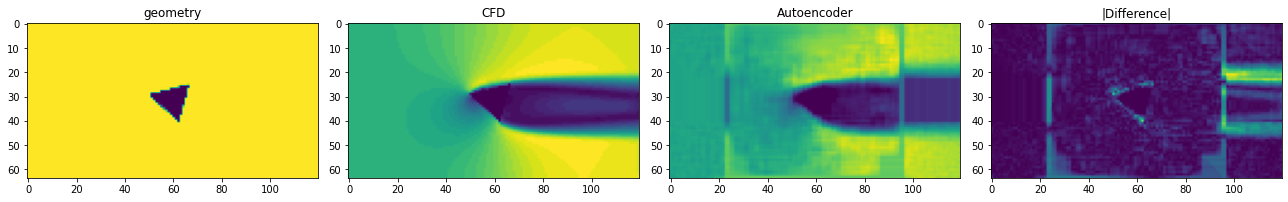

In [38]:
create_plot(0, X_images, Y_images, pred)

In [39]:
X_test = create_image_data("test_X")
Y_test = create_image_data("test_Y")
pred_test = model.predict(X_test)

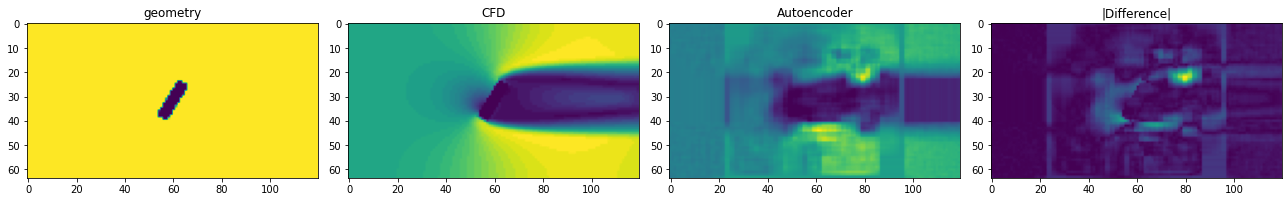

In [40]:
create_plot(0, X_test, Y_test, pred_test)